In [1]:
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
natural = pd.read_csv("https://data.cityofnewyork.us/api/views/uedp-fegm/rows.csv?accessType=DOWNLOAD")

In [3]:
natural.columns

Index([u'Zip Code', u'Building type (service class', u' Consumption (therms) ',
       u' Consumption (GJ) ', u'Utility/Data Source'],
      dtype='object')

In [4]:
zips = natural['Zip Code'].values

In [5]:
zips2 = []
for elem in zips:
    zips2.append(int(elem[:5]))

In [6]:
print(type(zips2[0]))

<type 'int'>


In [7]:
natural['Zip Code'] = zips2

In [8]:
borough = {10026: 'Manhattan', 10027: 'Manhattan', 10030: 'Manhattan', 10037: 'Manhattan', 10039: 'Manhattan', 10001: 'Manhattan', 10011: 'Manhattan', 10018: 'Manhattan', 10019: 'Manhattan', 10020: 'Manhattan', 10036: 'Manhattan', 10029: 'Manhattan', 10035: 'Manhattan', 10010: 'Manhattan', 10016: 'Manhattan', 10017: 'Manhattan', 10022: 'Manhattan', 10012: 'Manhattan', 10013: 'Manhattan', 10014: 'Manhattan', 10004: 'Manhattan', 10005: 'Manhattan', 10006: 'Manhattan', 10007: 'Manhattan', 10038: 'Manhattan', 10280: 'Manhattan', 10002: 'Manhattan', 10003: 'Manhattan', 10009: 'Manhattan', 10021: 'Manhattan', 10028: 'Manhattan', 10044: 'Manhattan', 10065: 'Manhattan', 10075: 'Manhattan', 10128: 'Manhattan', 10023: 'Manhattan', 10024: 'Manhattan', 10025: 'Manhattan', 10031: 'Manhattan', 10032: 'Manhattan', 10033: 'Manhattan', 10034: 'Manhattan', 10040: 'Manhattan'}

In [9]:
print(len(borough))

43


In [10]:
print(type(borough[10025][0]))

<type 'str'>


In [11]:
natural = natural.drop(['Building type (service class', ' Consumption (therms) '], axis=1).dropna()

In [12]:
natural['Borough'] = natural['Zip Code'].map(borough)

In [13]:
print(type(natural))

<class 'pandas.core.frame.DataFrame'>


In [14]:
natural2 = pd.DataFrame(natural[' Consumption (GJ) '].groupby([natural['Zip Code'], natural['Utility/Data Source'], natural['Borough']]).mean())

In [15]:
natural2.reset_index(inplace=True)

In [16]:
#natural2.set_index('Zip Code')

In [17]:
natural2.columns

Index([u'Zip Code', u'Utility/Data Source', u'Borough', u' Consumption (GJ) '], dtype='object')

In [21]:
#natural2 = natural2.drop(['index'], axis=1)

In [19]:
print(len(natural2))

43


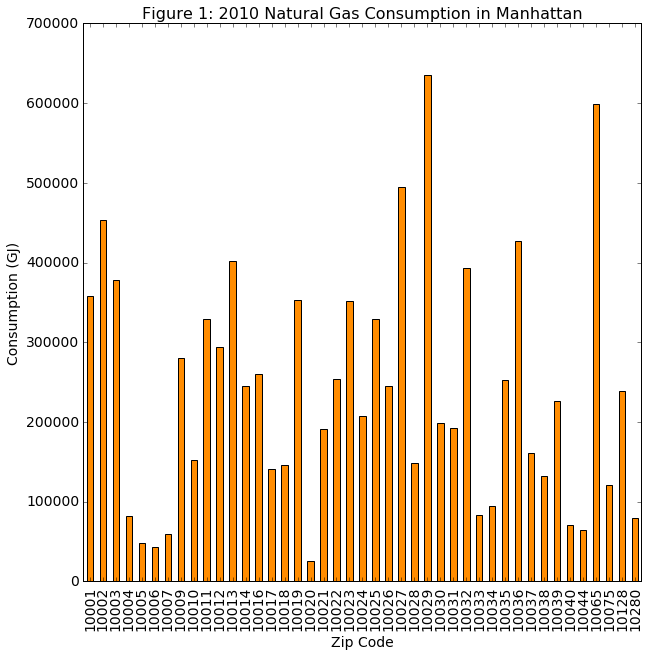

In [20]:
ax = natural2.plot(x='Zip Code', y=' Consumption (GJ) ', kind='bar', figsize=(10,10), legend=False, fontsize=14, color='DarkOrange')
ax.set_title('Figure 1: 2010 Natural Gas Consumption in Manhattan', fontsize=16)
ax.set_ylabel('Consumption (GJ)', fontsize=14)
ax.set_xlabel('Zip Code', fontsize=14)

### Figure 1, "2010 Natural Gas Conumpstion in Manhattan"
This figure depicts the average amount of natural gas consumption in the borough of Manhattan for the year of 2010 by zip code. The data was pulled from NYC's Open Data portal. 

In [ ]:
#natural2['Zip Code'].to_numeric()